In [1]:
import pandas as pd
import glob
import datetime
import time
import matplotlib.pyplot as plt
import pathlib
from threading import Thread

In [2]:
path=str(pathlib.Path().absolute())

In [3]:
excelFile='/mnt/volume/jupyter/szokereso/vip_szotar_1.3.xlsx'

SyntaxError: invalid syntax (<ipython-input-12-b2d8a163e771>, line 11)

2020-07-19 00:00:00


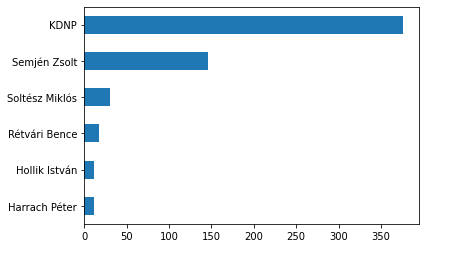

2020-07-18 00:00:00
2020-07-20 00:00:00


In [12]:
def generateFreqRes(filesThatDate,date,freqFilesPath):
        
    dfs=[]
    for file in filesThatDate:
        try:
            dfs.append(pd.read_csv(file))
        except pd.io.common.EmptyDataError:
            print('EmptyDataError: '+file)
            
    df = pd.concat([df[col] for df in dfs for col in df.columns if 'client' in col])
    df_value_counts = df.value_counts()
    df_value_counts.sort_values(ascending=True).to_csv(freqFilesPath+'dailyfreqfile_'+str(date).split(' ')[0]+'.csv')
    #plot = pd.read_csv(freqFilesPath+'dailyfreqfile_'+str(date).split(' ')[0]+'.csv').plot.barh()
    plot = pd.read_csv(freqFilesPath+'dailyfreqfile_'+str(date).split(' ')[0]+'.csv',index_col=0).plot.barh(legend=False)
    fig = plot.get_figure()
    fig.savefig(freqFilesPath+'barplot_'+str(date).split(' ')[0]+'.png', bbox_inches='tight')
    plt.close()

In [5]:
def get_files_sorted_by_date_after_a_date(look_for_this_pattern,cutoffdate):
    
    csvs = glob.glob(look_for_this_pattern)
    datetimes=[datetime.datetime(int(each.split('/')[-1][37:41]),
                                 int(each.split('/')[-1][42:44]),
                                 int(each.split('/')[-1][45:47]),
                                 int(each.split('/')[-1][48:50]),
                                 int(each.split('/')[-1][51:53])) for each in csvs]

    dt_csvs_filtered=[[dt, csv] for dt, csv in zip(datetimes,csvs) if dt >= datetime.datetime(*cutoffdate)]
    
    sorted_filtered_csvs = [csv
                        for _, csv in sorted(
                                         zip([eachpair[0] for eachpair in dt_csvs_filtered],
                                             [eachpair[1] for eachpair in dt_csvs_filtered]))]
    
    return sorted_filtered_csvs

In [6]:
def getFilesOnGivenDate(day,momFilesPathAndWildCard):
    
    dayafterday = day + datetime.timedelta(days=1)
    
    return list(
    set(get_files_sorted_by_date_after_a_date(momFilesPathAndWildCard,[day.year,day.month,day.day,0]))-\
    set(get_files_sorted_by_date_after_a_date(momFilesPathAndWildCard,[dayafterday.year,dayafterday.month,dayafterday.day,0])))

In [7]:
def doThisWhenNotEnoughFilesForDay(sleepThisMuch=60*60,day=None):
    print('Not enough files found. '+str(day)+' Sleeping '+str(sleepThisMuch/60)+' minutes.')
    time.sleep(sleepThisMuch)

In [8]:
def didMoreThanThisManySecondsElapsedSinceEndOfThatDay(singleDate,seconds):
    return (datetime.datetime.now() - (singleDate + datetime.timedelta(days=1))).total_seconds() > seconds

In [9]:
def getClients(excelFile=excelFile):
        
    xl = pd.ExcelFile(excelFile)
    sheetNames = [sheetName.strip() for sheetName in xl.sheet_names]
        
    return sheetNames

In [10]:
def dailyAggregCore(client):
    
    freqFilesPath = path+'/'+client+'/szokeresores/dailyfreqs/'
    momFilesPathAndWildCard  = path+'/'+client+'/szokeresores/clientreszurt/live_updated3_dict_only_1client_data_*_dfUnifiedNanFilteredOnlySomeColsUpdated3.csv'

    start_date = datetime.datetime(2020,7,1)
    day_count = 1000

    for single_date in (start_date + datetime.timedelta(n) for n in range(day_count)):
        while True:
            filesThatDate = getFilesOnGivenDate(single_date,momFilesPathAndWildCard)
            if len(filesThatDate) < 12 and not didMoreThanThisManySecondsElapsedSinceEndOfThatDay(single_date, 600):
                doThisWhenNotEnoughFilesForDay(sleepThisMuch=10*60,day=single_date)
            else:
                generateFreqRes(filesThatDate,single_date,freqFilesPath)
                print(single_date)
                break


/mnt/volume/jupyter/szokereso/negyedikfeladatScriptsUnited2/Főváros/szokeresores/clientreszurt/live_updated3_dict_only_1client_data_2020-07-01_00:00:24_dfUnifiedNanFilteredOnlySomeColsUpdated3.csv
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-01 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-02 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-03 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-03 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-04 00:00:00
2020-07-05 00:00:00
202

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



2020-07-05 00:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-fee44044f352>", line 9, in <module>
    threads[client].join()
  File "/usr/lib/python3.6/threading.py", line 1056, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3

KeyboardInterrupt: 

2020-07-04 00:00:00
2020-07-06 00:00:00


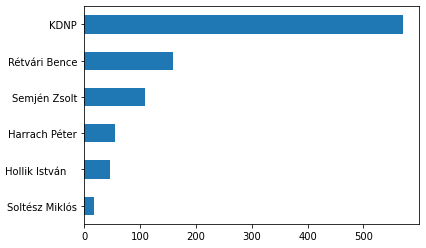

2020-07-05 00:00:00
2020-07-06 00:00:00


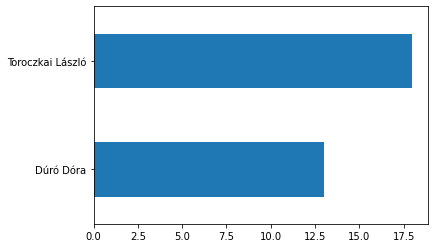

In [11]:
threads={}
for client in getClients():
    threads[client]=Thread(target=dailyAggregCore,args=[client])
    
for client in getClients():
    threads[client].start()
    
for client in getClients():
    threads[client].join()